In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
np.unique(data.target)

array([0, 1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaller = StandardScaler()

In [10]:
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

### Model

In [11]:
data.data.shape

(569, 30)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data.data.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 16ms/step - loss: 5.2275 - accuracy: 0.4673 - val_loss: 1.2563 - val_accuracy: 0.6959
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9561 - accuracy: 0.8141 - val_loss: 0.5267 - val_accuracy: 0.8947
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.8894 - val_loss: 0.4697 - val_accuracy: 0.9415
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.9221 - val_loss: 0.2753 - val_accuracy: 0.9474
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1972 - accuracy: 0.9347 - val_loss: 0.2684 - val_accuracy: 0.9591
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 0.9397 - val_loss: 0.2631 - val_accuracy: 0.9591
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9397 - val_loss: 0.2566 - val_accuracy: 0.9649
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9899 - val_loss: 0.1255 - val_accuracy: 0.9825
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9925 - val_loss: 0.1274 - val_accuracy: 0.9825
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9925 - val_loss: 0.1263 - val_accuracy: 0.9825
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9925 - val_loss: 0.1230 - val_accuracy: 0.9825
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0882 - accuracy: 0.9925 - val_loss: 0.1213 - val_accuracy: 0.9825
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9925 - val_loss: 0.1212 - val_accuracy: 0.9825
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9925 - val_loss: 0.1204 - val_accuracy: 0.9825
Epoch 

In [16]:
print('train score', model.evaluate(X_train, y_train))
print('test score', model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9950
train score [0.0808371752500534, 0.9949748516082764]
6/6 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9825
test score [0.11229147017002106, 0.9824561476707458]


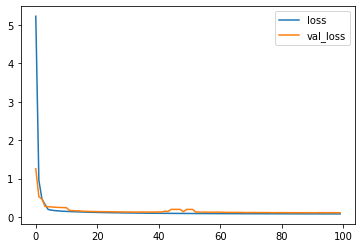

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

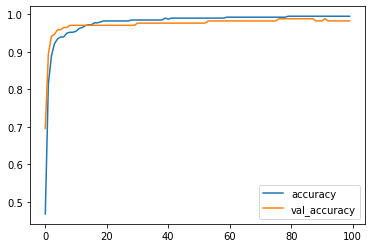

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();